<a href="https://colab.research.google.com/github/aidegare/bigdata/blob/main/LHCb_2023_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 2!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.
.

In [7]:
# !wget https://github.com/MohamedElashri/HEP-ML/releases/download/ROOT/ROOT.tar.zip
# !unzip /content/ROOT.tar.zip
# !tar -xf  ROOT.tar
# !apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion libpython3.6 
# # !pip install root_numpy # optional if you want to convert Trees to numpy arrays and other things like that


In [8]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")



In [9]:
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib/libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libTreePlayer.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libImt.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libNet.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libTree.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libHist.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libGraf.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libGpad.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libGraf3d.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libMultiProc.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libMinuit.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libFoam.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libPyROOT.so')

<CDLL '/content/root_build/lib/libPyROOT.so', handle 21f36d0 at 0x7fee9dbc2df0>

In [10]:
!which python

/usr/local/bin/python


Warning in <TROOT::Append>: Replacing existing TH1: gauss (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


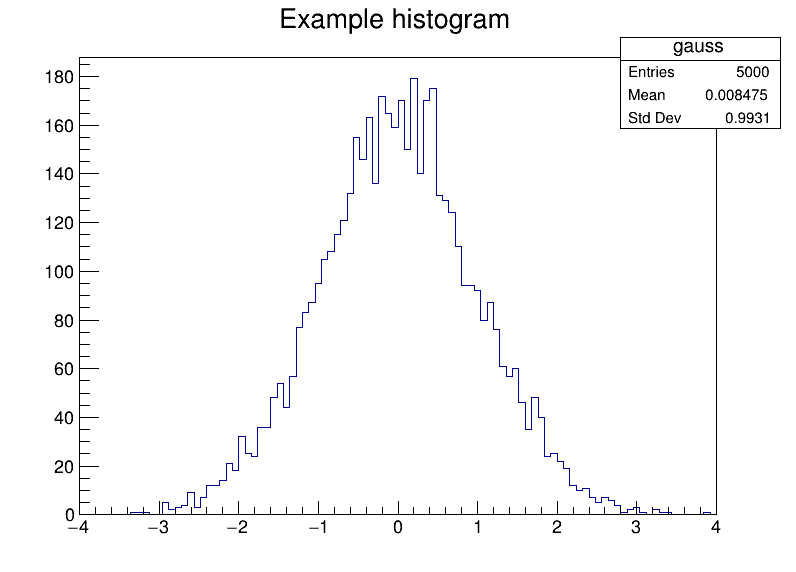

In [11]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/12320/modules/items/450514

Then upload it either directly or to your Google Drive and then mount this to your Colab environment

# IMPORTANT: Since Google Colab was repeatedly crashing with the ROOT framework, I had to import it for every cell since I had to comment out all the previous cell to be able to work on this assignment. I apologize for the poor readability of a few exercises, but that is the only way I made it work.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 4967545 out of range events


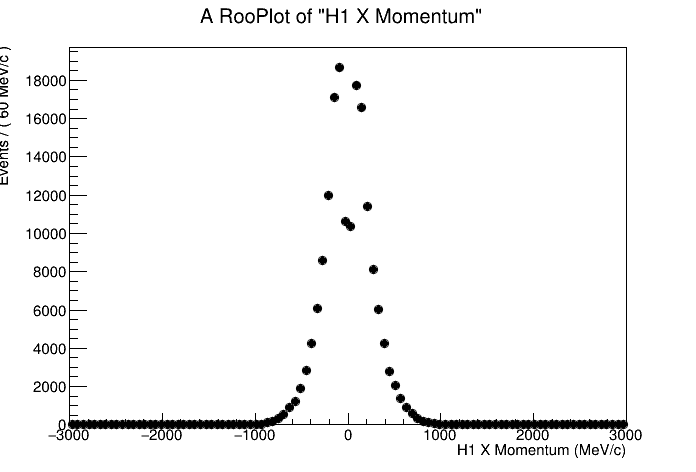

In [13]:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")

#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")

# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")

# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()


#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


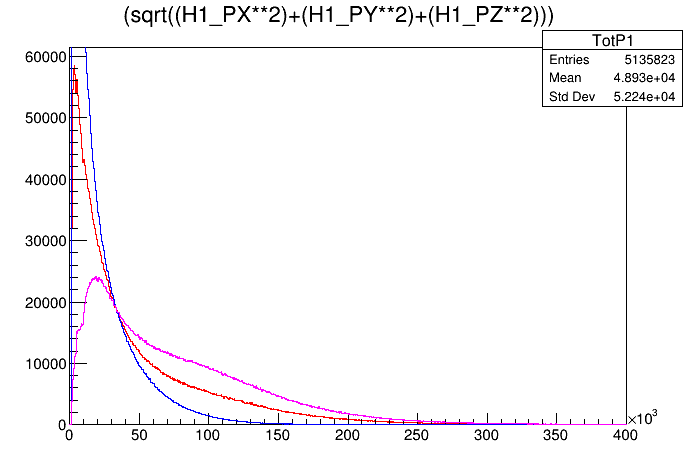

In [14]:
#Here make a plot of the Total momentum of each of the three daughters
import ROOT

#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
from math import *

#Create the canvas, name the tree and get bins number
tree.SetName("tree")
canvas = ROOT.TCanvas("c")
bins = "1000"

#Create the total momentum variables, since the variables already created couldn't be used
H1_Ptot = "(sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2)))"
H2_Ptot = "(sqrt((H2_PX**2)+(H2_PY**2)+(H2_PZ**2)))"
H3_Ptot = "(sqrt((H3_PX**2)+(H3_PY**2)+(H3_PZ**2)))"

#Draw total momentum for every daughter particle
tree.Draw(H1_Ptot +">>TotP1("+bins+",0,400000")
tree.Draw(H2_Ptot +">>TotP2("+bins+",0,400000")
tree.Draw(H3_Ptot +">>TotP3("+bins+",0,400000")


# #Create the right framework for the data to be used
# histogram1 = ROOT.TH1F("P1", "Total Momentum", int(bins),0,30000)
# histogram2 = ROOT.TH1F("TotP2", "Total Momentum", int(bins),0,30000)
# histogram3 = ROOT.TH1F("TotP3", "Total Momentum", int(bins),0,30000)

# For some reason, this (^) was needed before the 25th of February but not after

#Create the histograms from the directories
histogram1 = ROOT.gDirectory.Get("TotP1")
histogram2 = ROOT.gDirectory.Get("TotP2")
histogram3 = ROOT.gDirectory.Get("TotP3")

#Set different colors for each histogram
histogram1.SetLineColor(2)
histogram2.SetLineColor(4)
histogram3.SetLineColor(6)

#Print the histograms together and the canvas
histogram1.Draw()
histogram2.Draw('same')
histogram3.Draw('same')
canvas.Update()
canvas.Draw()

Now plot the total momentum for the mother (M_Ptot)

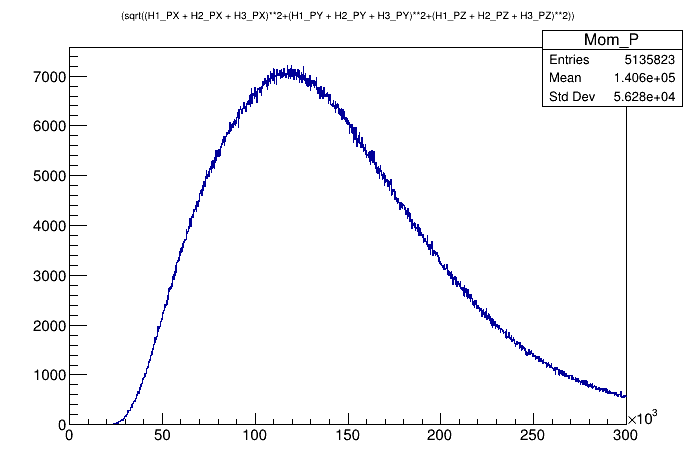

In [15]:
#use the histogram plotting tools, plot the momentum of the mother
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
from math import *

#Create the canvas, name the tree and get bins number
tree.SetName("tree")
canvas = ROOT.TCanvas("blblblbl")
bins = "1500"

# #Create the a framework allowing the data to be used later
# histogram = ROOT.TH1F("TotP", "Total Momentum", int(bins),0,600000)

# For some reason, this (^) was needed before the 25th of February but not after

#Creating the total momentum variable for the mother particle
mom_entum = "(sqrt((H1_PX + H2_PX + H3_PX)**2+(H1_PY + H2_PY + H3_PY)**2+(H1_PZ + H2_PZ + H3_PZ)**2))"

#Draw momentum of the mother particle
tree.Draw(mom_entum+ ">>Mom_P("+bins+",0,300000")
histogram = ROOT.gDirectory.Get("Mom_P")
histogram.Draw()
canvas.Update()
canvas.Draw()


Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [16]:
tree.Show(45)

======> EVENT:45
 B_FlightDistance = 257.002
 B_VertexChi2    = 1.86557
 H1_PX           = 420.341
 H1_PY           = -110.663
 H1_PZ           = 5883.77
 H1_ProbK        = 0.0121832
 H1_ProbPi       = 0.819139
 H1_Charge       = -1
 H1_IPChi2       = 27121.5
 H1_isMuon       = 1
 H2_PX           = -985.637
 H2_PY           = 630.989
 H2_PZ           = 35342.1
 H2_ProbK        = 0.667011
 H2_ProbPi       = 0.0456395
 H2_Charge       = 1
 H2_IPChi2       = 13712.4
 H2_isMuon       = 0
 H3_PX           = -6242.3
 H3_PY           = -862.213
 H3_PZ           = 277275
 H3_ProbK        = 0.0750182
 H3_ProbPi       = 0.428353
 H3_Charge       = 1
 H3_IPChi2       = 1026.12
 H3_isMuon       = 0


We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

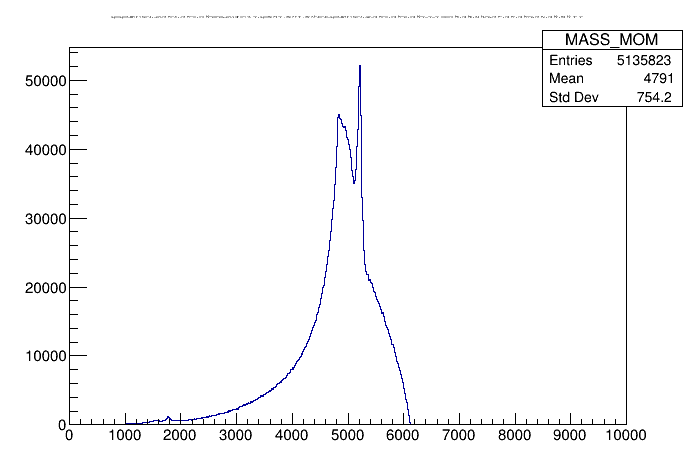

In [17]:
#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?
#use the histogram plotting tools, plot the momentum of the mother
import ROOT

#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")

#We need to do the maths since trying to access the variables created results in attempting to access a null-pointer 
#Create the energy variables of the three daughter particles

#The given value of a Kaon mass is 493.67 Mev, but since we are working in natural units, the value has to be divided by c**2 which gives 5.48*10**(-15)
E1 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H1_PX**2) + (H1_PY**2) + (H1_PZ**2)))**2))"
E2 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H2_PX**2) + (H2_PY**2) + (H2_PZ**2)))**2))"
E3 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H3_PX**2) + (H3_PY**2) + (H3_PZ**2)))**2))"


#Create the variables for the mother particle
energy_mother = "(" + E1 + "+" + E2 + "+" + E3 + ")"
tot_momentum = "(sqrt((H1_PX + H2_PX + H3_PX)**2+(H1_PY + H2_PY + H3_PY)**2+(H1_PZ + H2_PZ + H3_PZ)**2))"
mass_mother = "(sqrt(" + energy_mother + "**2 - " + tot_momentum + "**2))"

#Create the canvas, name the tree and get bins number
tree.SetName("tree")
canvas = ROOT.TCanvas("canvasMass")
bins = "1000"

#Draw the mass of the mother particle
tree.Draw(mass_mother+">>MASS_MOM(1000,0,10000)")

# #Create the right framework for the data to be used later on
# histogram = ROOT.TH1F("MASS_MOM", "Mass of mother particle", int(bins),0,10000)

# For some reason, this (^) was needed before the 25th of February but not after

#Get the histogram from the directory
histogram = ROOT.gDirectory.Get("MASS_MOM")

#Print the histogram and the canvas
histogram.Draw()
canvas.Update()
canvas.Draw()

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

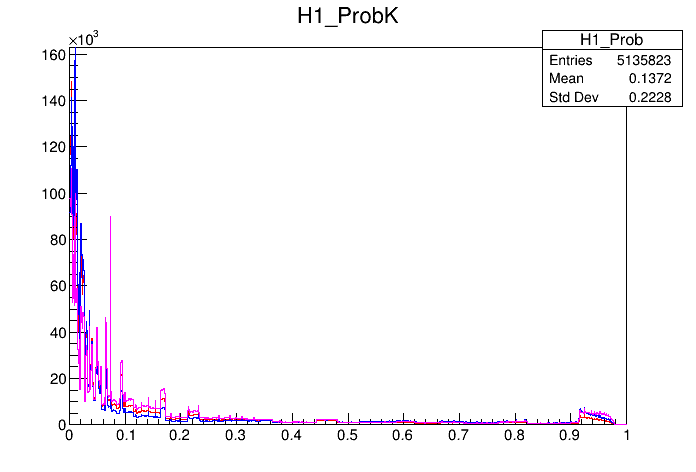

In [18]:
#Make plots of H1/H2/H3 _ProbK on one plot
canvas = ROOT.TCanvas("help")
bins = "1000"
#For once, attempting to access the variables created works, no need to do the maths
#Draw the likehood of the particle for being a Kaon for all daughter particles
tree.Draw("H1_ProbK"+">>H1_Prob(1000,0,1)")
tree.Draw("H2_ProbK"+">>H2_Prob(1000,0,1)")
tree.Draw("H3_ProbK"+">>H3_Prob(1000,0,1)")

#Create the histograms from the directories 
histogram1 = ROOT.gDirectory.Get("H1_Prob")
histogram2 = ROOT.gDirectory.Get("H2_Prob")
histogram3 = ROOT.gDirectory.Get("H3_Prob")

#Set different colours for each histogram
histogram1.SetLineColor(2)
histogram2.SetLineColor(4)
histogram3.SetLineColor(6)

#Print the histograms together and the canvas
histogram1.Draw()
histogram2.Draw('same')
histogram3.Draw('same')
canvas.Draw()

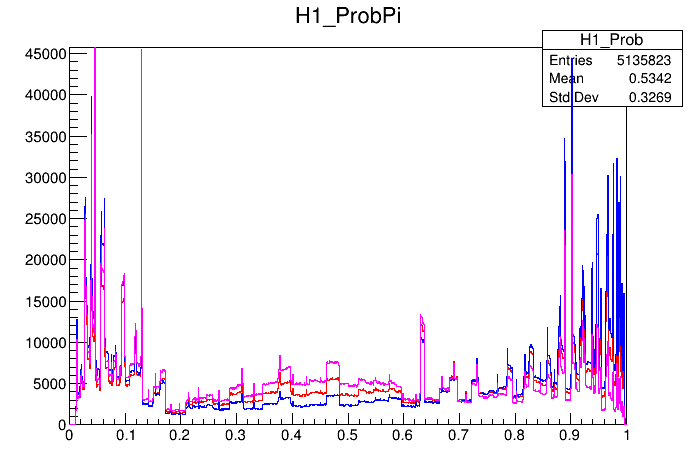

In [19]:
#Make plots of H1/H2/H3 _ProbPi on one plot
canvas = ROOT.TCanvas("whyChris")
bins = "1000"

#For once, attempting to access the variables created works, no need to do the maths
#Draw the likehood of the particle for being a Kaon for all daughter particles
tree.Draw("H1_ProbPi"+">>H1_Prob(1000,0,1)")
tree.Draw("H2_ProbPi"+">>H2_Prob(1000,0,1)")
tree.Draw("H3_ProbPi"+">>H3_Prob(1000,0,1)")

#Create the histograms from the directories 
histogram1 = ROOT.gDirectory.Get("H1_Prob")
histogram2 = ROOT.gDirectory.Get("H2_Prob")
histogram3 = ROOT.gDirectory.Get("H3_Prob")

#Set different colours for each histogram
histogram1.SetLineColor(2)
histogram2.SetLineColor(4)
histogram3.SetLineColor(6)

#Print the histograms together and the canvas
histogram1.Draw()
histogram2.Draw('same')
histogram3.Draw('same')
canvas.Draw()

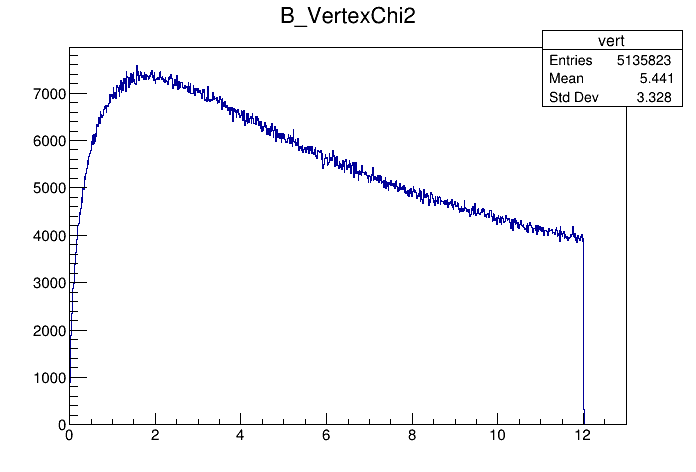

In [20]:
#For all our particles, make a plot of the B_VertexChi2
canvas = ROOT.TCanvas("canva")
tree.Draw("B_VertexChi2"+">>vert(1000, 0, 13)")
histogram = ROOT.gDirectory.Get("vert")
histogram.Draw()
canvas.Draw()

Using these plots, we can now make a preselection string. This is a text string that looks like 

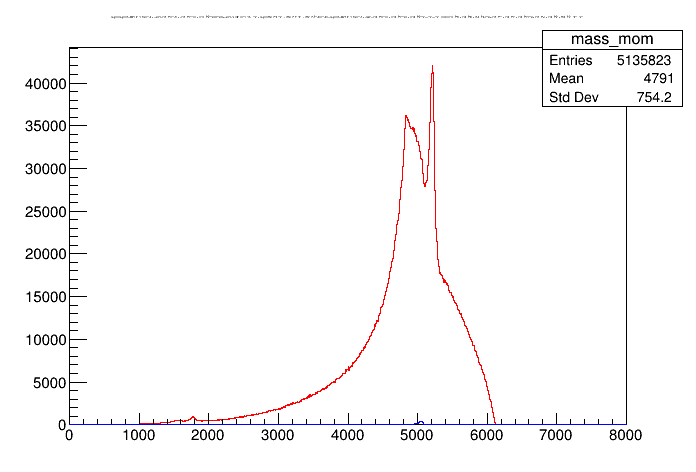

In [21]:
#To apply the selection - we can use the copytree command:
import ROOT

#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")

#We want to know which ones are kaons, se we need to select them. The 0.7 boundary gives enough data
#while also filtering enough noise. Then select for anything that is not a muon.
selection=("H1_ProbK>0.7&H2_ProbK>0.7&H3_ProbK>0.7&!H1_isMuon&!H2_isMuon&!H3_isMuon")
CutTree=tree.CopyTree(selection)

#We need to do the maths since trying to access the variables created results in attempting to access a null-pointer 
#Create the energy variables of the three daughter particles
E1 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H1_PX**2) + (H1_PY**2) + (H1_PZ**2)))**2))"
E2 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H2_PX**2) + (H2_PY**2) + (H2_PZ**2)))**2))"
E3 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H3_PX**2) + (H3_PY**2) + (H3_PZ**2)))**2))"

#Create the variables for the mother particle
energy_mother = "(" + E1 + "+" + E2 + "+" + E3 + ")"
tot_momentum = "(sqrt((H1_PX + H2_PX + H3_PX)**2+(H1_PY + H2_PY + H3_PY)**2+(H1_PZ + H2_PZ + H3_PZ)**2))"
mass_mother = "(sqrt(" + energy_mother + "**2 - " + tot_momentum + "**2))"

canvas = ROOT.TCanvas("itHurts")

tree.Draw(mass_mother+">>mass_mom(1000,0,8000)")
CutTree.Draw(mass_mother+">>cut_mass_mom(1000,0,8000)")

histogram = ROOT.gDirectory.Get("mass_mom")
histogram2 = ROOT.gDirectory.Get("cut_mass_mom")

histogram.SetLineColor(2)
histogram2.SetLineColor(4)

histogram.Draw()
histogram2.Draw('same')

canvas.Draw()

#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

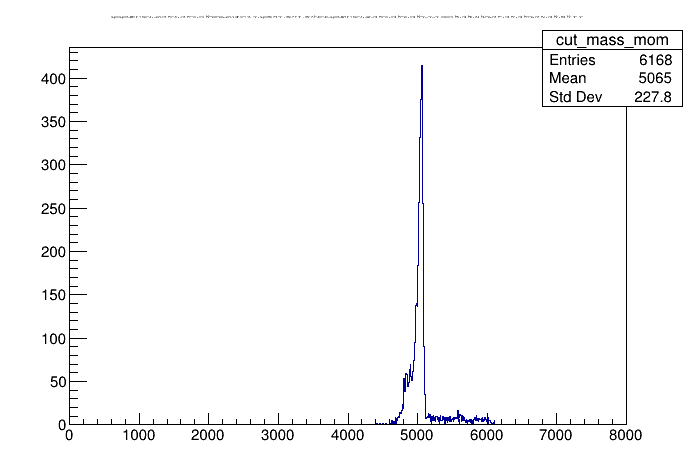

In [22]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?

#To apply the selection - we can use the copytree command:
import ROOT

#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
selection=("H1_ProbK>0.7&H2_ProbK>0.7&H3_ProbK>0.7&!H1_isMuon&!H2_isMuon&!H3_isMuon")
CutTree=tree.CopyTree(selection)

#We need to do the maths since trying to access the variables created results in attempting to access a null-pointer 
#Create the energy variables of the three daughter particles
E1 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H1_PX**2) + (H1_PY**2) + (H1_PZ**2)))**2))"
E2 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H2_PX**2) + (H2_PY**2) + (H2_PZ**2)))**2))"
E3 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H3_PX**2) + (H3_PY**2) + (H3_PZ**2)))**2))"

#Create the variables for the mother particle
energy_mother = "(" + E1 + "+" + E2 + "+" + E3 + ")"
tot_momentum = "(sqrt((H1_PX + H2_PX + H3_PX)**2+(H1_PY + H2_PY + H3_PY)**2+(H1_PZ + H2_PZ + H3_PZ)**2))"
mass_mother = "(sqrt(" + energy_mother + "**2 - " + tot_momentum + "**2))"

canvas = ROOT.TCanvas("iWannaSleep")

CutTree.Draw(mass_mother+">>cut_mass_mom(1000,0,8000)")

histogram = ROOT.gDirectory.Get("cut_mass_mom")

histogram.Draw()
canvas.Draw()

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

# NOTE: From now on, the code may work or not. I just haven't had the opportunity of testing it in Google Colab because it kept crashing when operating the .fitTo() command. We tried with other students to fix this, but nothing worked... This is therefore a guess of how I could implement the code to perform the tasks asked.

In [23]:
#To apply the selection - we can use the copytree command:
import ROOT

#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
selection=("H1_ProbK>0.7&H2_ProbK>0.7&H3_ProbPi>0.7&!H1_isMuon&!H2_isMuon&!H3_isMuon")
CutTree=tree.CopyTree(selection)

#We need to do the maths since trying to access the variables created results in attempting to access a null-pointer 
#Create the energy variables of the three daughter particles
E1 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H1_PX**2) + (H1_PY**2) + (H1_PZ**2)))**2))"
E2 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H2_PX**2) + (H2_PY**2) + (H2_PZ**2)))**2))"
E3 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H3_PX**2) + (H3_PY**2) + (H3_PZ**2)))**2))"

#Create the variables for the mother particle
energy_mother = "(" + E1 + "+" + E2 + "+" + E3 + ")"
tot_momentum = "(sqrt((H1_PX + H2_PX + H3_PX)**2+(H1_PY + H2_PY + H3_PY)**2+(H1_PZ + H2_PZ + H3_PZ)**2))"
mass_mother = "(sqrt(" + energy_mother + "**2 - " + tot_momentum + "**2))"

#define physical measurment that we want to fit using RooRealVar
# var = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass = ROOT.RooRealVar("mass_mother","Mass",5000,5900,"MeV/C^{2}")

#passing the rest of the variables into the model
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = ROOT.RooRealVar("Mean","Mean",5250,5000,6000)
gaussWidth = ROOT.RooRealVar("Width","Width",10,0,10000)

#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)

#We also need a background, so let's use a (simple) exponential:
exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)

#Define the  model for the background:
Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add the normalisation factors at the end as scaling factors

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )


In [ ]:
#To apply the selection - we can use the copytree command:
import ROOT

#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
selection=("H1_ProbK>0.7&H2_ProbK>0.7&H3_ProbPi>0.7&!H1_isMuon&!H2_isMuon&!H3_isMuon")
CutTree=tree.CopyTree(selection)

#Put our data set into a RooDataSet structure
data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", CutTree, ROOT.RooArgSet(mass))

#Then we can do the fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below

In [ ]:
#Crystal Ball method
#To apply the selection - we can use the copytree command:
import ROOT

#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
selection=("H1_ProbK>0.7&H2_ProbK>0.7&H3_ProbPi>0.7&!H1_isMuon&!H2_isMuon&!H3_isMuon")
CutTree=tree.CopyTree(selection)

#We need to do the maths since trying to access the variables created results in attempting to access a null-pointer 
#Create the energy variables of the three daughter particles
E1 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H1_PX**2) + (H1_PY**2) + (H1_PZ**2)))**2))"
E2 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H2_PX**2) + (H2_PY**2) + (H2_PZ**2)))**2))"
E3 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H3_PX**2) + (H3_PY**2) + (H3_PZ**2)))**2))"

#Create the variables for the mother particle
energy_mother = "(" + E1 + "+" + E2 + "+" + E3 + ")"
tot_momentum = "(sqrt((H1_PX + H2_PX + H3_PX)**2+(H1_PY + H2_PY + H3_PY)**2+(H1_PZ + H2_PZ + H3_PZ)**2))"
mass_mother = "(sqrt(" + energy_mother + "**2 - " + tot_momentum + "**2))"

#define physical measurment that we want to fit using RooRealVar
# var = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass = ROOT.RooRealVar("mass_mother","Mass",5000,5900,"MeV/C^{2}")
ballMean = ROOT.RooRealVar("Mean","Mean",5250,5000,6000)
ballWidth = ROOT.RooRealVar("Width","Width",10,0,10000)

#Signal fit with crystal ball
chris_ball = ROOT.RooCBShape("crystal ball signal","Crystal ball", mass, ballMean, ballWidth) 
chris_norm = ROOT.RooRealVar("crystal ball norm", "Norm", mass, ballMean, ballWidth)

#Get the values from the normalization and error for the fit
chris_normvalues = chris_norm.getValV()
chris_error = chris_norm.getError()

#We also need a background, so let's use a (simple) exponential:
exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)

#Get the values from the normalization and error for the fit again
exp_Norm_value = exp_Norm.getValV()
exp_norm_error = exp_Norm.getError()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

In [ ]:
#Now to plot it all
canvas=ROOT.TCanvas("doesntwork")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
canvas.Update()

#print the values required
print(exp_Norm_value)
print(exp_norm_error)
#print(frame.whyChris) found this very funny because it's an actual function
print(frame.chiSquare())

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

## This code does work since it is not using any value coming out of the previous .fitTo() function. However, I could not make it work since it has to run after the previous cells for the code to make sense and also since it needs some of the data from these cells.

In [1]:
#Here do your calculation of the final result
#To apply the selection - we can use the copytree command:
import ROOT

#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
selection=("H1_ProbK>0.7&H2_ProbK>0.7&H3_ProbPi>0.7&!H1_isMuon&!H2_isMuon&!H3_isMuon")
CutTree=tree.CopyTree(selection)

#We need to do the maths since trying to access the variables created results in attempting to access a null-pointer 
#Create the energy variables of the three daughter particles
E1 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H1_PX**2) + (H1_PY**2) + (H1_PZ**2)))**2))"
E2 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H2_PX**2) + (H2_PY**2) + (H2_PZ**2)))**2))"
E3 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H3_PX**2) + (H3_PY**2) + (H3_PZ**2)))**2))"

#Create the variables for the mother particle
energy_mother = "(" + E1 + "+" + E2 + "+" + E3 + ")"
tot_momentum = "(sqrt((H1_PX + H2_PX + H3_PX)**2+(H1_PY + H2_PY + H3_PY)**2+(H1_PZ + H2_PZ + H3_PZ)**2))"
mass_mother = "(sqrt(" + energy_mother + "**2 - " + tot_momentum + "**2))"

#and plot
canvas = ROOT.TCanvas("help")

#Select the B+ and B- by adding the charges to 1 and -1
selection_BP = ("H1_Charge+H2_Charge+H3_Charge == 1")
selection_BM = ("H1_Charge+H2_Charge+H3_Charge == -1")

#Cut the trees
CutTree_BP=CutTree.CopyTree(selection_BP)
CutTree_BM=CutTree.CopyTree(selection_BM)

CutTree_BP.Draw(mass_mother+">>BP(300,4000,7000)")
CutTree_BM.Draw(mass_mother+">>BM(300,4000,7000)")

histogram = ROOT.gDirectory.Get("BP")
histogram2 = ROOT.gDirectory.Get("BM")

histogram.SetLineColor(2)
histogram2.SetLineColor(4)

histogram.Draw()
histogram2.Draw('same')

canvas.Draw()

ModuleNotFoundError: ignored

# Unfortunately, from now on we use the .fitTo() function again so this code is again a guess of how I would do it if it worked.

In [ ]:
#Repeat the "how do we count the number of events" part for the new CutTrees
#To apply the selection - we can use the copytree command:
import ROOT

#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
selection=("H1_ProbK>0.7&H2_ProbK>0.7&H3_ProbPi>0.7&!H1_isMuon&!H2_isMuon&!H3_isMuon")
CutTree=tree.CopyTree(selection)

#We need to do the maths since trying to access the variables created results in attempting to access a null-pointer 
#Create the energy variables of the three daughter particles
E1 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H1_PX**2) + (H1_PY**2) + (H1_PZ**2)))**2))"
E2 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H2_PX**2) + (H2_PY**2) + (H2_PZ**2)))**2))"
E3 = "(sqrt((5.48*10**(-15))**2 + (sqrt((H3_PX**2) + (H3_PY**2) + (H3_PZ**2)))**2))"

#Create the variables for the mother particle
energy_mother = "(" + E1 + "+" + E2 + "+" + E3 + ")"
tot_momentum = "(sqrt((H1_PX + H2_PX + H3_PX)**2+(H1_PY + H2_PY + H3_PY)**2+(H1_PZ + H2_PZ + H3_PZ)**2))"
mass_mother = "(sqrt(" + energy_mother + "**2 - " + tot_momentum + "**2))"

#define physical measurment that we want to fit using RooRealVar
# var = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass = ROOT.RooRealVar("mass_mother","Mass",5000,5900,"MeV/C^{2}")

#passing the rest of the variables into the model
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = ROOT.RooRealVar("Mean","Mean",5250,5000,6000)
gaussWidth = ROOT.RooRealVar("Width","Width",10,0,10000)

#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gaussMean,gaussWidth)
Gauss_Norm_BP= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)
Gauss_Norm_BM= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)


#We also need a background, so let's use a (simple) exponential:
exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm_BP= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)
exp_Norm_BM= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)


#Define the  model for the background:
Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add the normalisation factors at the end as scaling factors

model_BP=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm_BP, exp_Norm_BP) )
model_BM=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm_BM, exp_Norm_BM) )



In [ ]:
#To apply the selection - we can use the copytree command:
import ROOT

#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetDown.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
selection=("H1_ProbK>0.7&H2_ProbK>0.7&H3_ProbPi>0.7&!H1_isMuon&!H2_isMuon&!H3_isMuon")
CutTree=tree.CopyTree(selection)

#Put our data set into a RooDataSet structure
data_to_fit_BP=ROOT.RooDataSet("Data Set","data_to_fit", CutTree_BP, ROOT.RooArgSet(mass))
data_to_fit_BM=ROOT.RooDataSet("Data Set","data_to_fit", CutTree_BM, ROOT.RooArgSet(mass))


#Then we can do the fitting:

model_BP.fitTo(data_to_fit_BP)
model_BM.fitTo(data_to_fit_BM)

#if everything went well, you will see the outputs of RooFit below

In [ ]:
#Plot B+
canvas=ROOT.TCanvas("positivity")
frame_BP=mass.frame()
data_to_fit_BP.plotOn(frame_BP)
model_BP.plotOn(frame_BP, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model_BP.plotOn(frame_BP, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model_BP.plotOn(frame_BP)
frame_BP.Draw()
canvas.Update()


In [ ]:
#Plot B-
canvas=ROOT.TCanvas("negativity")
frame_BM=mass.frame()
data_to_fit_BM.plotOn(frame_BM)
model_BM.plotOn(frame_BM, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model_BM.plotOn(frame_BM, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model_BM.plotOn(frame_BM)
frame_BM.Draw()
canvas.Update()


In [ ]:
#We can start calculating the assymmetry
import math
NM = Gauss_Norm_BM.getValV()
NP = Gauss_Norm_BP.getValV()

A = (NM - NP)/(NM + NP)

sigma = math.sqrt((1 - A**2)/(NM + NP))
print(sigma)

#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?